
0: 480x640 1 person, 2 chairs, 5.8ms
Speed: 1.0ms preprocess, 5.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


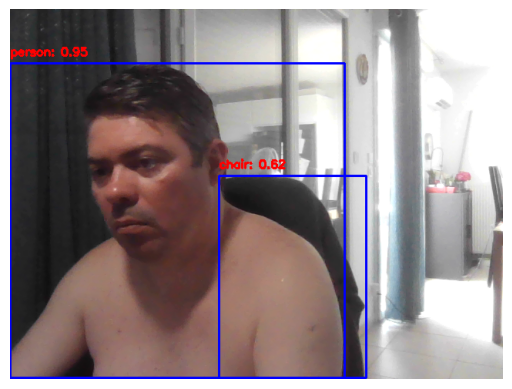

In [22]:
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load the YOLO model
model = YOLO('yolo11n.pt')  # You can choose different versions like yolov8s.pt, yolov8m.pt, etc.

# Access the camera and capture an image
cap = cv2.VideoCapture(0)  # 0 is usually the default camera
if not cap.isOpened():
    print("Error: Could not open camera.")
else:
    ret, frame = cap.read()
    if ret:
        # Perform inference on the BGR image directly
        results = model(frame)

        # Convert the frame from BGR to RGB for displaying with Matplotlib
        image_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Draw bounding boxes and labels on the BGR image
        for result in results:
            for box in result.boxes:
                x1, y1, x2, y2 = map(int, box.xyxy[0])
                conf = box.conf[0]
                cls = int(box.cls[0])
                label = model.names[cls]

                if conf > 0.5:  # Confidence threshold
                    cv2.rectangle(frame, (x1, y1), (x2, y2), (255, 0, 0), 2)
                    cv2.putText(frame, f'{label}: {conf:.2f}', (x1, y1 - 10),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

        # Convert back to RGB for displaying
        image_display = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Display the image with bounding boxes
        plt.imshow(image_display)
        plt.axis('off')
        plt.show()
    else:
        print("Error: Could not capture frame.")

# Release the camera
cap.release()

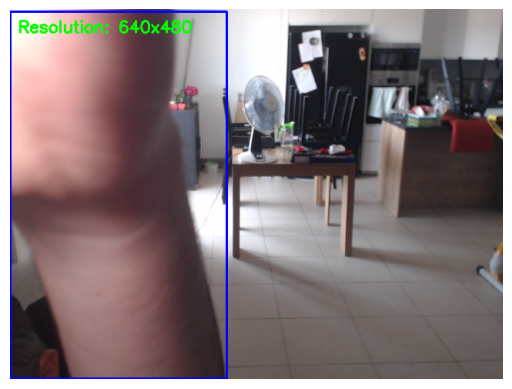

KeyboardInterrupt: 

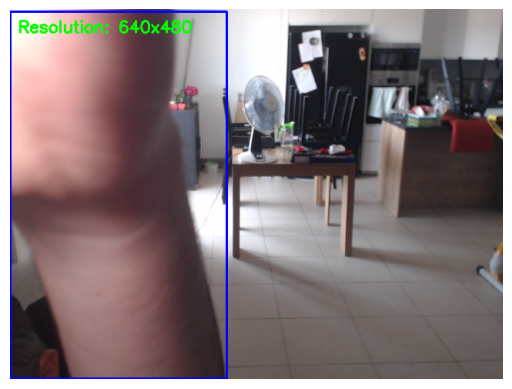

In [33]:
import cv2
from ultralytics import YOLO
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import time

# Load the YOLO model
model = YOLO('yolo11n.pt')  # You can choose different versions like yolov8s.pt, yolov8m.pt, etc.

# Access the camera
cap = cv2.VideoCapture(4)  # 0 is usually the default camera
if not cap.isOpened():
    print("Error: Could not open camera.")
else:
    try:
        while True:
            ret, frame = cap.read()
            if not ret:
                print("Error: Could not capture frame.")
                break

            # Get the resolution of the frame
            height, width = frame.shape[:2]
            resolution_text = f"Resolution: {width}x{height}"

            # Perform inference on the BGR image directly
            results = model(frame)

            # Draw bounding boxes and labels on the BGR image
            for result in results:
                for box in result.boxes:
                    x1, y1, x2, y2 = map(int, box.xyxy[0])
                    conf = box.conf[0]
                    cls = int(box.cls[0])
                    label = model.names[cls]

                    if conf > 0.5:  # Confidence threshold
                        cv2.rectangle(frame, (x1, y1), (x2, y2), (255, 0, 0), 2)
                        cv2.putText(frame, f'{label}: {conf:.2f}', (x1, y1 - 10),
                                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

            # Put the resolution text on the frame
            cv2.putText(frame, resolution_text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

            # Convert the frame to RGB for displaying
            image_display = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

            # Display the image
            plt.imshow(image_display)
            plt.axis('off')
            clear_output(wait=True)  # Clear the previous output
            display(plt.gcf())  # Display the current figure

            # Break the loop if 'q' is pressed
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break

            # Add a small delay to control the refresh rate
            time.sleep(1)  # Adjust the sleep time as needed

    finally:
        # Release the camera
        cap.release()
        cv2.destroyAllWindows()
